# Ideale Kennlinie
<a id="Sec-Kennlinie"></a>

Jede einzelne der Komponenten führt die an ihr anliegenden Eingangssignal in Ausgangssignale über. Wie diese Überführung genau aussieht beschreibt die sogenannte **Kennlinie**, die für jede Komponente unterschiedlich aussehen kann. In {numref}`ideale_kennlinie` ist beispielhaft eine lineare, ideale Kennlinie dargestellt:

:::{figure-md} ideale_kennlinie
<img src="draw/ideale_kennlinie.jpg" alt="ideale_kennlinie" class="bg-primary mb-1" width="400px" label = ideale_kennlinie>

Ideale Messkennlinie.
:::

## Statische Kenngrößen
<a id="SubSec-Statische_Kenngrößen"></a>

Für jede Eingangsgröße $u$ wird anhand der Kennlinie eine Ausgangsgröße $y$ definiert. Beispielsweise wird anhand der Kennlinie eines Temperatursensors ein bestimmter Temperaturwert in eine Spannung umgewandelt. 

* Der Bereich, indem der Sensor beispielsweise noch korrekt arbeitet (meist vom Hersteller garantiert) wird **Messbereich (engl. range)** genannt und wird durch den minimal und maximal möglichen Wert, der noch als Eingang angelegt werden kann oder darf, angegeben. Im Falle eines Temperatursensors wäre ein typischer Messbereich z.B. -40°C bis 120°C. 
* Die Differenz zwischen diesen Maximal- und Minimalwert nennt man **Spanne (engl. span)** (bezogen auf unser Beispiel also 160°C). 
* Die Spanne ist mit einem Bereich auf der y-Achse korreliert, nämlich dem sogenannten **Vollbereichssignal (engl. full scale output = FSO)**.
* Der **Übertragungsfaktor $k$** oder auch oft *Verstärkung* genannt beschreibt die Überführung des Eingangssignals der Messeinrichtung, also der Messgröße, in ein Ausgangssignal:

$$y = k \cdot u$$

* Die **Statische Kennlinie** ist im Prinzip der *Übertragungsfaktor*, aber dieses Mal definiert für alle möglichen Eingangssignale.

$$y(u) = k \cdot u$$

## Empfindlichkeit

Die Kennlinie sollte immer eine gewisse Steigung aufweisen. Oder man könnte auch sagen, dass wenn sich die Eingangsgröße $u$ ändert, dass dies auch immer eine Änderung in der Ausgangsgröße $y$ mit sich ziehen sollte. Im Falle einer Verstärkungseinheit könnte diese Änderung sogar vergrößert werden und das System reagiert somit *empfindlicher* auf Änderungen der Eingangsgröße. Mathematisch betrachtet bedeutet die Steilheit nichts anderes als die Steigung bzw. die Ableitung der Ausgangsgröße $y(u)$ an einer bestimmten Stelle $u$:

$$S(u) = \frac{\partial y(u)}{\partial u} = \frac{\partial f(u)}{\partial u}$$

Dies wird auch die Empfindlichkeit $S(u)$ genannt und entspricht der Tangente im Punkt $u$.

## Beispiele
<a id="SubSec-Beispiel"></a>

### Kennlinie von Widerstandsthermometern

Reine Metalle sind **Kaltleiter**. Platin hat beispielsweise einen Widerstandswert von R0 = R(0) = 100 Ohm bei 0 °C, daher der Name PT100. Sie können bei geeigneter Ausrüstung bis 850 °C eingesetzt werden. Sie haben eine fast lineare Kennlinie bei einer relativen Widerstandsänderung von knapp 0,4 % pro °C:

$$R(T) = R_0 \cdot (1 + AT + BT^2)$$

Folgende Parameter gelten für bestimmte Temperaturbereiche:
* 0-850°C: A= 3,9e-3/°C, B=-5,7e-7/°C$^2$
* -200-0°C: C = -4,2e-1/°C$^4$

Thermistoren mit negativen Temperaturkoeffizienten (NTC = Negative thermal coefficient , Heißleiter) weisen aufgrund des zugrundeliegenden Halbleiter-Effektes eine hohe Abhängigkeit von Fehlstellen, wie der Dotierung der Grundstoffe auf. 
**Heißleiter** sind bis etwa 150 °C einsetzbar. 
Sie weisen gegenüber Platin-Messwiderständen eine deutlich höhere Empfindlichkeit auf:

$$ R(T)=R_{25} \cdot \mathrm e^{B\left(\frac{1}{T+273}-\frac{1}{298}\right)}$$

mit R25 = 1000 Ohm und B = 3528.

Ein Transition Edge Sensor (TES), bzw. auf deutsch Phasenübergangsthermometer, ist ein supraleitender Temperatursensor, der in der Lage ist, kleinste Temperaturänderungen im Bereich von wenigen 100 $\mu\mathrm K$ zu messen. Seine Umgebungstemperatur wird je nach Material auf wenige mK runtergekühlt, um das Material in einen supraleitenden Zustand (d.h. sein Widerstand verschwindet) zu bringen. Dies ist die sogenannte kritische Temperatur, $T_c$, aber der Materiale supraleitende Eigenschaften aufweisen. Der Widerstand wird über Anlegen einer Stromstärke minimal aufgeheizt, sodass sein Arbeitspunkt in den Übergang (die steile Flanke) geschoben wird. An diesem Punkt ist die Ableitung, und somit die Empfindlichkeit, maximal. 

$$ R(T)= \frac{a}{1 + \mathrm e^{-k(T-T_c)}} $$

mit z.B. $k$ = 1.86/mK, $a$ = 0.224 Ohm und $T_c$ = 103.2 mK

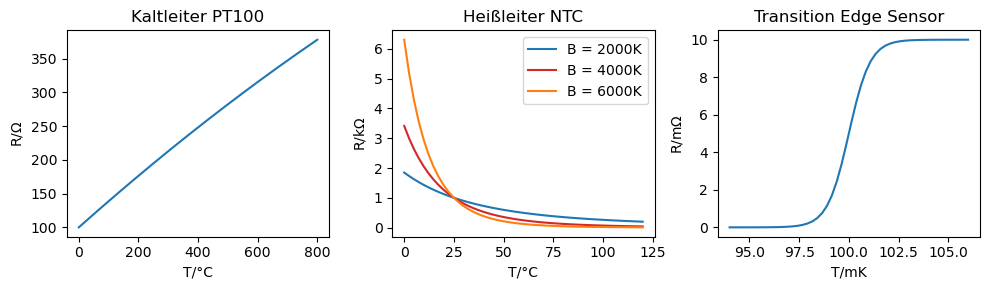

In [1]:
#Benötigte Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
#plt.xkcd()
plt.rcParams['font.size'] = 10; # Schriftgröße

#--------- Kaltleiter PT100 -------------
T_PT = np.linspace(0, 800, num=800)
def R_PT(T_PT):
    R_0 = 100 # in Ohm
    A = 3.93e-3 # in 1/°C
    B = -5.7e-7 # in 1/^C^2
    return R_0 * (1 + A*T_PT + B * T_PT**2)

#--------- Heißleiter NTC -------------
T_NTC = np.linspace(0+273.15, 120+273.15, num=50)
def R_NTC(T_NTC, B):
    R_25 = 1000 # in Ohm
    T_25 = 25.0 + 273.15 # in Kelvin
    return R_25 * np.exp(B * (1/(T_NTC) - 1/T_25))

#--------- Transition Edge Sensor -------------
T = np.linspace(94, 106, num=50)
def R(T):
    k = 1.86 # in 1/mK
    a = 0.01 # in Ohm
    Tk = 100 # in mK
    return a / (1+ np.exp(-k * (T-Tk)))


#--------- Diagramme -------------
f, axs = plt.subplots(1,3,figsize=(10,3))

axs[0].plot(T_PT,R_PT(T_PT), color = 'tab:blue')
axs[0].set_xlabel('T/°C')
axs[0].set_ylabel(r'R/$\Omega$')
axs[0].set_title('Kaltleiter PT100')

axs[1].plot(T_NTC-273.15,R_NTC(T_NTC, 2000)/1000, label = "B = 2000K", color = 'tab:blue')
axs[1].plot(T_NTC-273.15,R_NTC(T_NTC, 4000)/1000, label = "B = 4000K", color = 'tab:red')
axs[1].plot(T_NTC-273.15,R_NTC(T_NTC, 6000)/1000, label = "B = 6000K", color = 'tab:orange')
axs[1].set_xlabel('T/°C')
axs[1].set_ylabel(r'R/k$\Omega$')
axs[1].set_title('Heißleiter NTC')
axs[1].legend()

axs[2].plot(T,R(T)*1000, color = 'tab:blue')
axs[2].set_xlabel('T/mK')
axs[2].set_ylabel(r'R/m$\Omega$')
axs[2].set_title('Transition Edge Sensor')

plt.tight_layout()
plt.show()

### Wunder an Empfindlichkeit

::::::{margin}
:::::{grid}
::::{grid-item-card}
:class-header: bg-light
How does LIGO work?? Working Principles of LIGO l LIGO technology l LIGO in science (englisch, TIP Knowledge)

<iframe width="200" height="113" src="https://www.youtube.com/embed/trQNpZHL8KM?si=G0PqgFzXdbCuLMxR" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
::::
:::::
::::::

LIGO (Laser Interferometer Gravitational-Wave Observatory) ist ein Gravitationswellendetektor. Mit diesem experimentellen Aufbau werden kleinste Strörungen in der Raumzeit, so genannten Gravitationswellen, gemessen, welche damals von Albert Einstein innerhalb seiner allgemeinen Relativitätstheorie vorhergesagt wurden. Gravitationswellen entstehen, wenn sich sehr schwere Massen in der Raumzeit bewegen, wie z.B. zwei schwarze Löcher oder Neutronensterne, die umeinander kreisen. Der direkte Nachweis von Gravitationswellen wird durch die wirklich verschwindend kleinen Effekte der Wellen auf den Detektor erheblich erschwert. Die Amplitude einer Gravitationswelle ist zudem umgekehrt proportional zur Entfernung der Quelle. Dadurch klingen sogar Wellen, welche von Extremsystemen wie das von zwei verschmelzenden schwarzen Löchern, auf dem Weg zur Erde zu einer kleinen Amplitude ab. 

LIGO, VIRGO und KAGRA sind ultra-empfindliche Detektoren und nutzen Laserinterferometrie, um die Bewegung von *freien* Massen zu messen, die durch eben diese Gravitationswellen in der Raumzeit ausgelöst wurde. 
Mit Laserinterferometern werden wir uns später noch genauer befassen. 
Es hilft auf jeden Fall, das Interferometer so groß wie möglich zu machen. Die *Arme* des Interferometers sind mehrere Kilometer lang (LIGO z.B. 4 km). Die stärkste Gravitationswelle hat diese Armlänge um ca. 10$^{-19}$m geändert. 
Das bedeutet eine relative Längenänderung von lediglich:

$$h = \frac{dL}{L} \approx 5\cdot 10^{-22}$$

In [ ]:
L = 4000 # Armlänge in m
dL = 1e-19 # Spiegelbewegung in m
h = dL / L
print('relative Armlängenänderung bei einer Gravitationswelle: ', h)

Nimmt man den Abstand von Erde und Sonne (150 000 000 km), würde sich dieser beim Einfall einer Gravitationswellen um weniger als einen Atomdurchmesser ändern:

In [ ]:
d_Erde_Sonne = 150e9 # Abstand Erde Sonne in m
dL_Erde_Sonne = d_Erde_Sonne * h
print('Abstandsänderung Erde-Sonne verursacht durch Gravitationswellen: ',dL_Erde_Sonne, ' = ',dL_Erde_Sonne*1e12, 'pm' )

Die Größe eines Atoms beträgt um die 100 pm = 1 A (Angstrom = 10 $^{-10}$). 

Rechts im nachfolgenden Bild ist die Empfindlichkeitskurve eines Laserinterferometers gegeben. Die Phasenverschiebung ist ein Maß für die Verschiebung der Spiegel. Phase kann über die Wellenlänge in eine Längenänderung umgerechnet werden. Das werden wir später noch mal genauer betrachten ($2\pi \hat = \lambda =$ 1064nm). 
* Ein klassisches Laserinterferometer überlagert zwei elektromagnetische Wellen und produziert ein sinusförmiges Intensitätsprofil im Ausgangsbereich (blaue Kurve). Die maximale Empfindlichkeit für Gravitationswellen (oder Spiegelbewegungen) wird an den Wendepunkten erreicht. An den Extrempunkten erhält man für kleine Spiegelbewegungen gar kein Ausgangssignal.
* Gravitationswellendetektoren benutzen in ihren Interferometerarmen zusätzliche Spiegel, um optische Resonatoren einzubauen. Optische Resonatoren *speichern* das Licht in den Armen, d.h. es hin und her reflektiert, bis es am Ende das Interferometer wieder verlässt. Dadurch verlängert sich künstlich die Armlänge (von 4km). Das Interferometer wird empfindlicher, da Spiegelbewegungen aufaddiert werden. Im Abhängigkeit von der *Güte* des optischen Resonators können sehr starke Überhöhungen erreicht werden (lila und rote Kurve im Diagramm). Eine kleine Änderung der Spiegelbewegung verursacht nun eine drastische Änderung im Ausgangssignal. Dadurch werden kleine Signale stark überhöht und deutlich messbar. Um dies jedoch in der Praxis zu erreichen, muss das Interferometer an sich extrem stabil und robust sein, sodass Erdbeben oder der Hase, der über das Feld hoppelt, keine Messsignale verursachen. 

![Bild](pictures/LIGO_kennlinie.jpg)